In [3]:
import nibabel as nib
import numpy as np

# 讀取 NIfTI 檔案
file_path = '/NFS/Wu/MRI/hw2/output_dir_d/IXI002-Guys-0828-T1_dgm.nii.gz' 
img = nib.load(file_path)

# 獲取體素數據
data = img.get_fdata()

# 獲取體素尺寸（以毫米為單位）
voxel_dims = img.header.get_zooms()
print(f"Voxel dimensions (mm): {voxel_dims}")

voxel_volume = np.prod(voxel_dims)  # 單個體素的體積
print(f"Voxel volumn (mm): {voxel_volume}")

# 計算非零體素的數量
non_zero_voxels = np.count_nonzero(data)
print(f"Number of non-zero voxels: {non_zero_voxels}")

# 計算非零體素的總體積
non_zero_volume = non_zero_voxels * voxel_volume
print(f"Total non-zero volume (mm³): {non_zero_volume}")


Voxel dimensions (mm): (0.9375, 0.9375, 1.199997)
Voxel volumn (mm): 1.0546848773956299
Number of non-zero voxels: 46283
Total non-zero volume (mm³): 48813.98018050194


In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import glob
import re

file_path = '/NFS/Wu/MRI/hw2/output_dir_d/*.nii.gz'
file_names = glob.glob(file_path)
# 初始化總結果的 DataFrame
final_volume_df = pd.DataFrame()

# 定義標籤
labels = {
    1: "Left-Thalamus-Proper",
    2: "Right-Thalamus-Proper",
    3: "Left-Caudate",
    4: "Right-Caudate",
    5: "Left-Putamen",
    6: "Right-Putamen",
    7: "Left-Pallidum",
    8: "Right-Pallidum",
    9: "Left-Hippocampus",
    10: "Right-Hippocampus",
    11: "Left-Amygdala",
    12: "Right-Amygdala"
}

# 逐一處理每個文件
for file in file_names:
    img = nib.load(file)
    data = img.get_fdata()
    
    # 初始化每個文件的體積字典
    volume_dict = {}
    file_id = re.search(r'IXI(\d+)', file).group(1)  # 匹配 "IXI" 后的数字部分
    for label_value, label_name in labels.items():
        # 建立布爾掩碼以篩選特定標籤的體素
        label_mask = (data == label_value)
        
        # 計算體素數量
        num_voxels = np.sum(label_mask)
        
        # 獲取體素尺寸（以毫米為單位）
        voxel_dims = img.header.get_zooms()
        voxel_volume = np.prod(voxel_dims)  # 單個體素的體積
        region_volume = num_voxels * voxel_volume  # 該標籤的總體積
        
        # 將該標籤的體積結果儲存到字典
        volume_dict[label_name] = region_volume
    # 將每個文件的結果存入 DataFrame
    volume_df = pd.DataFrame(volume_dict, index=[file_id])
    final_volume_df = pd.concat([final_volume_df, volume_df])

# 將最終的 DataFrame 保存到 CSV 文件
output_csv_path = "/NFS/Wu/MRI/hw2/volumes.csv"
final_volume_df.to_csv(output_csv_path, index_label="IXI_ID")

# 顯示計算結果
print(final_volume_df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     Left-Thalamus-Proper  Right-Thalamus-Proper  Left-Caudate  Right-Caudate  \
002           8380.526036            7991.347316   3711.436084    3735.693836   
012           9036.589056            8748.658522   3379.228681    3514.229077   
013           8497.611425            7870.072788   3701.950614    4002.536348   
014           8194.922801            7148.672683   3482.578519    3586.992593   
015           9271.782964            7911.232398   4141.769048    4164.972236   
..                    ...                    ...           ...            ...   
651           7688.671006            6917.694531   3067.030903    2982.655913   
652           8760.246257            8259.269015   3371.840511    3174.613681   
653           9180.017639            8368.961393   3767.350989    3881.257458   
661           6680.410257            6501.112855   2929.930485    2655.710929   
662           8387.956234            7809.985654   4221.927424    4245.130622   

     Left-Putamen  Right-Pu

In [2]:
import pandas as pd

data = pd.read_csv("/NFS/Wu/MRI/hw2/IXI.csv")

# 查看數據結構
print(data.head())

   IXI_ID  SEX_ID  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID  OCCUPATION_ID  \
0       1       1     170      80          2           3              5   
1       2       2     164      58          1           4              1   
2      12       1     175      70          1           2              1   
3      13       1     182      70          1           2              1   
4      14       2     163      65          1           4              1   

   QUALIFICATION_ID        DOB  DATE_AVAILABLE  STUDY_DATE        AGE  
0                 2  1968/2/22               0         NaN        NaN  
1                 5  1970/1/30               1     38674.0  35.800137  
2                 5  1966/8/20               1     38504.0  38.781656  
3                 5  1958/9/15               1     38504.0  46.710472  
4                 5  1971/3/15               1     38512.0  34.236824  


In [4]:
import pandas as pd

data1 = pd.read_csv("/NFS/Wu/MRI/hw2/volumes.csv")
data2 = pd.read_csv("/NFS/Wu/MRI/hw2/IXI.csv")

data2_filtered = data2[['IXI_ID', 'AGE', 'SEX_ID']]

# 合併數據，確保 IXI_ID 一致
merged_data = pd.merge(data1, data2_filtered, on="IXI_ID", how="inner")

# 删除重复的 IXI_ID 行
merged_data = merged_data.drop_duplicates(subset="IXI_ID")

output_csv_path = "/NFS/Wu/MRI/hw2/merged.csv"
merged_data.to_csv(output_csv_path, index=False)

print(merged_data)

     IXI_ID  Left-Thalamus-Proper  Right-Thalamus-Proper  Left-Caudate  \
0         2           8380.526036            7991.347316   3711.436084   
1        12           9036.589056            8748.658522   3379.228681   
2        13           8497.611425            7870.072788   3701.950614   
3        14           8194.922801            7148.672683   3482.578519   
4        15           9271.782964            7911.232398   4141.769048   
..      ...                   ...                    ...           ...   
586     648           7570.571690            7204.593928   3229.463711   
587     651           7688.671006            6917.694531   3067.030903   
588     652           8760.246257            8259.269015   3371.840511   
589     653           9180.017639            8368.961393   3767.350989   
590     662           8387.956234            7809.985654   4221.927424   

     Right-Caudate  Left-Putamen  Right-Putamen  Left-Pallidum  \
0      3735.693836   5294.518085    5262.8775

In [6]:
import pandas as pd

data = pd.read_csv("/NFS/Wu/MRI/hw2/merged.csv")

labels = {
    1: "Left-Thalamus-Proper",
    2: "Right-Thalamus-Proper",
    3: "Left-Caudate",
    4: "Right-Caudate",
    5: "Left-Putamen",
    6: "Right-Putamen",
    7: "Left-Pallidum",
    8: "Right-Pallidum",
    9: "Left-Hippocampus",
    10: "Right-Hippocampus",
    11: "Left-Amygdala",
    12: "Right-Amygdala"
}

age_correlation_results = {}
sex_correlation_results = {}

for label, region in labels.items():
    if region in data.columns:
        # 計算各區域體積和年齡的相關係數
        age_corr = data[region].corr(data['AGE'])
        age_correlation_results[region] = age_corr
        
        # 計算各區域體積和年齡的相關係數
        sex_corr = data[region].corr(data['SEX_ID'])
        sex_correlation_results[region] = sex_corr

# 將结果轉為 DataFrame 格式
age_correlation_df = pd.DataFrame(list(age_correlation_results.items()), columns=['Region', 'Age Correlation']).set_index('Region')
sex_correlation_df = pd.DataFrame(list(sex_correlation_results.items()), columns=['Region', 'Sex Correlation']).set_index('Region')

print("各區域體積和年齡的相關係數：")
print(str(age_correlation_df) + "\n")

print("各區域體積和性別的相關係數：")
print(sex_correlation_df)


各區域體積和年齡的相關係數：
                       Age Correlation
Region                                
Left-Thalamus-Proper         -0.667041
Right-Thalamus-Proper        -0.645534
Left-Caudate                 -0.484654
Right-Caudate                -0.491341
Left-Putamen                 -0.499489
Right-Putamen                -0.489158
Left-Pallidum                -0.283906
Right-Pallidum               -0.349506
Left-Hippocampus             -0.325695
Right-Hippocampus            -0.408658
Left-Amygdala                -0.337366
Right-Amygdala               -0.281986

各區域體積和性別的相關係數：
                       Sex Correlation
Region                                
Left-Thalamus-Proper         -0.398158
Right-Thalamus-Proper        -0.417258
Left-Caudate                 -0.332002
Right-Caudate                -0.326807
Left-Putamen                 -0.459399
Right-Putamen                -0.468881
Left-Pallidum                -0.498421
Right-Pallidum               -0.463161
Left-Hippocampus             -0.4

<Figure size 1000x600 with 0 Axes>

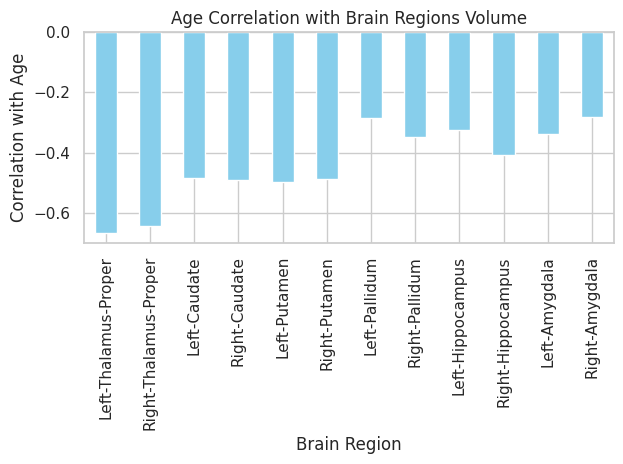

<Figure size 1000x600 with 0 Axes>

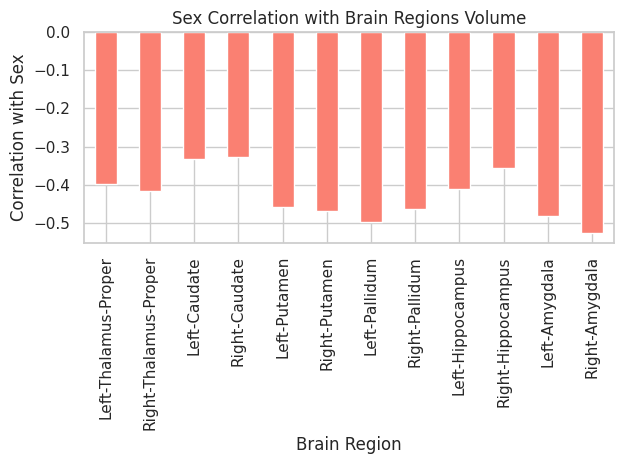

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置圖表風格
sns.set(style="whitegrid")

# 繪製年齡相關係數的條形圖
plt.figure(figsize=(10, 6))
age_correlation_df.plot(kind='bar', legend=False, color='skyblue')
plt.title("Age Correlation with Brain Regions Volume")
plt.xlabel("Brain Region")
plt.ylabel("Correlation with Age")
plt.tight_layout()
plt.show()

# 繪製性別相關係數的條形圖
plt.figure(figsize=(10, 6))
sex_correlation_df.plot(kind='bar', legend=False, color='salmon')
plt.title("Sex Correlation with Brain Regions Volume")
plt.xlabel("Brain Region")
plt.ylabel("Correlation with Sex")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


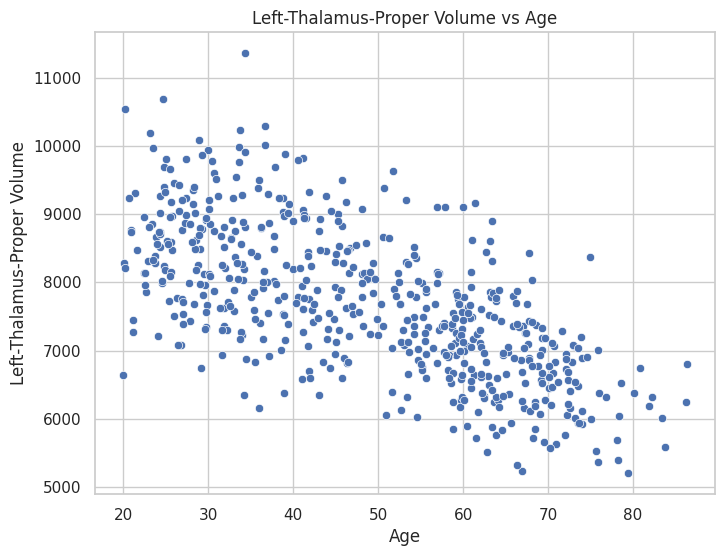

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


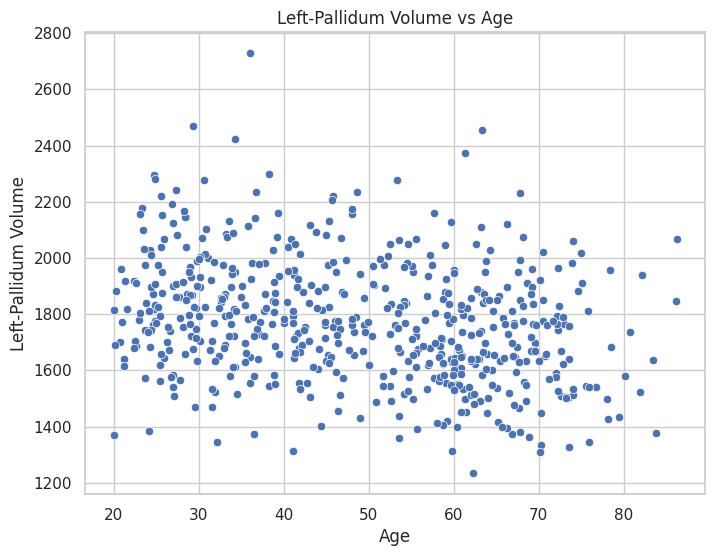

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/NFS/Wu/MRI/hw2/merged.csv")

# 定義特定的區域標籤
labels = {
    1: "Left-Thalamus-Proper",
    7: "Left-Pallidum"
}

# 繪製點陣圖
for label, region in labels.items():
    if region in data.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data['AGE'], y=data[region])
        plt.title(f"{region} Volume vs Age")
        plt.xlabel("Age")
        plt.ylabel(f"{region} Volume")
        plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


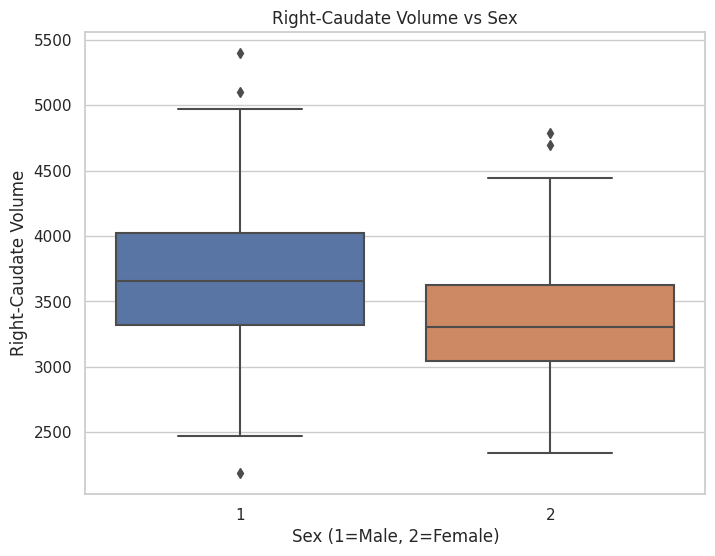

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


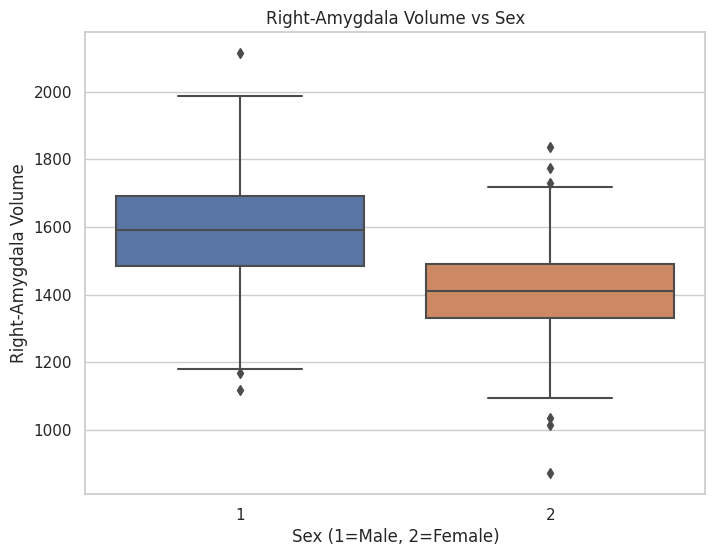

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labels = {
    4: "Right-Caudate",
    12: "Right-Amygdala"
}

for label, region in labels.items():
    if region in data.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data['SEX_ID'], y=data[region])
        plt.title(f"{region} Volume vs Sex")
        plt.xlabel("Sex (1=Male, 2=Female)")
        plt.ylabel(f"{region} Volume")
        plt.show()
